# For audio info

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
LBSV_path = './output/data/features_augmented_0_3.csv'
ASV_path = './output/data/features_ASV_augmented_0_3.csv'

In [3]:
df = pd.read_csv('output/data/df_audio.csv')
df

,file_path,sampling_rate,rms,dbfs,label,duration
0,./content/LibriSeVoc/gt/3857_180923_000008_000...,24000,0.061510,-24.220951,real,6.840000
1,./content/LibriSeVoc/gt/426_122821_000035_0000...,24000,0.060355,-24.385653,real,6.070000
2,./content/LibriSeVoc/gt/6081_41998_000029_0000...,24000,0.072021,-22.850687,real,11.680000
3,./content/LibriSeVoc/gt/5322_7680_000032_00000...,24000,0.034738,-29.183570,real,5.920000
4,./content/LibriSeVoc/gt/78_369_000026_000000.wav,24000,0.101507,-19.870003,real,9.849958
...,...,...,...,...,...,...
26397,./content/LibriSeVoc/diffwave/3879_173592_0000...,24000,0.068184,-23.326223,fake,7.232000
26398,./content/LibriSeVoc/diffwave/8095_274345_0000...,24000,0.060096,-24.422962,fake,11.370667
26399,./content/LibriSeVoc/diffwave/7794_295948_0000...,24000,0.072218,-22.826923,fake,17.290667
26400,./content/LibriSeVoc/diffwave/6209_34599_00000...,24000,0.079749,-21.965374,fake,6.304000


In [4]:
df.label.value_counts()

label
real    13201
fake    13201
Name: count, dtype: int64

In [5]:
len(df.duration.unique())

5125

In [6]:
df.duration.value_counts()

duration
5.920000     59
5.280000     57
5.130667     55
5.930667     54
6.880000     52
             ..
11.550083     1
22.340000     1
15.300083     1
12.099958     1
17.290667     1
Name: count, Length: 5125, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26402 entries, 0 to 26401
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   file_path      26402 non-null  object 
 1   sampling_rate  26402 non-null  int64  
 2   rms            26402 non-null  float64
 3   dbfs           26402 non-null  float64
 4   label          26402 non-null  object 
 5   duration       26402 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 1.2+ MB


In [8]:
df.describe()

,sampling_rate,rms,dbfs,duration
count,26402.0,26402.000000,26402.000000,26402.000000
mean,24000.0,0.060800,-24.741539,9.526883
std,0.0,0.018722,2.791288,4.186767
min,24000.0,0.009805,-40.170113,5.000000
25%,24000.0,0.049083,-26.181149,6.410667
50%,24000.0,0.060280,-24.396368,8.270042
75%,24000.0,0.070954,-22.980284,11.370667
max,24000.0,0.228224,-12.832742,33.258667


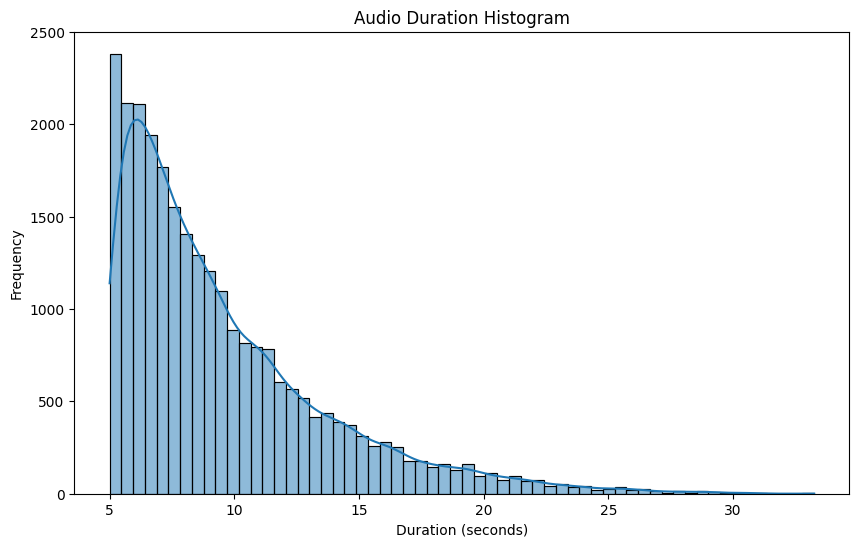

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=60, kde=True)
plt.title('Audio Duration Histogram')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [10]:
df = df[df['duration'] <= 10]
df

,file_path,sampling_rate,rms,dbfs,label,duration
0,./content/LibriSeVoc/gt/3857_180923_000008_000...,24000,0.061510,-24.220951,real,6.840000
1,./content/LibriSeVoc/gt/426_122821_000035_0000...,24000,0.060355,-24.385653,real,6.070000
3,./content/LibriSeVoc/gt/5322_7680_000032_00000...,24000,0.034738,-29.183570,real,5.920000
4,./content/LibriSeVoc/gt/78_369_000026_000000.wav,24000,0.101507,-19.870003,real,9.849958
5,./content/LibriSeVoc/gt/39_121915_000013_00000...,24000,0.027996,-31.057756,real,5.529958
...,...,...,...,...,...,...
26394,./content/LibriSeVoc/diffwave/7447_91186_00002...,24000,0.057005,-24.881546,fake,9.034667
26395,./content/LibriSeVoc/diffwave/6367_65536_00003...,24000,0.073831,-22.635100,fake,7.136000
26397,./content/LibriSeVoc/diffwave/3879_173592_0000...,24000,0.068184,-23.326223,fake,7.232000
26400,./content/LibriSeVoc/diffwave/6209_34599_00000...,24000,0.079749,-21.965374,fake,6.304000


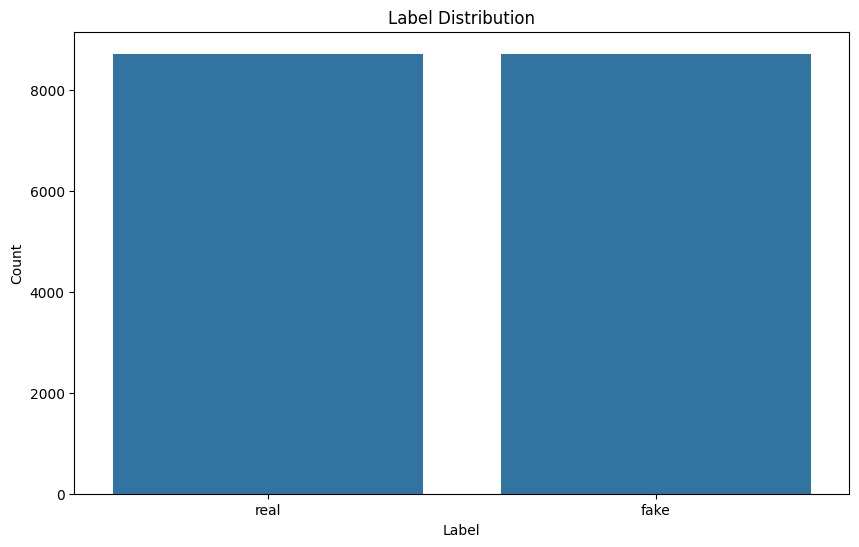

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# For features file

In [12]:
df_features = pd.read_csv(LBSV_path)

In [13]:
features = df_features.drop(columns=['label', 'file_path', 'sampling_rate'], axis=1).copy()
labels = df_features['label']

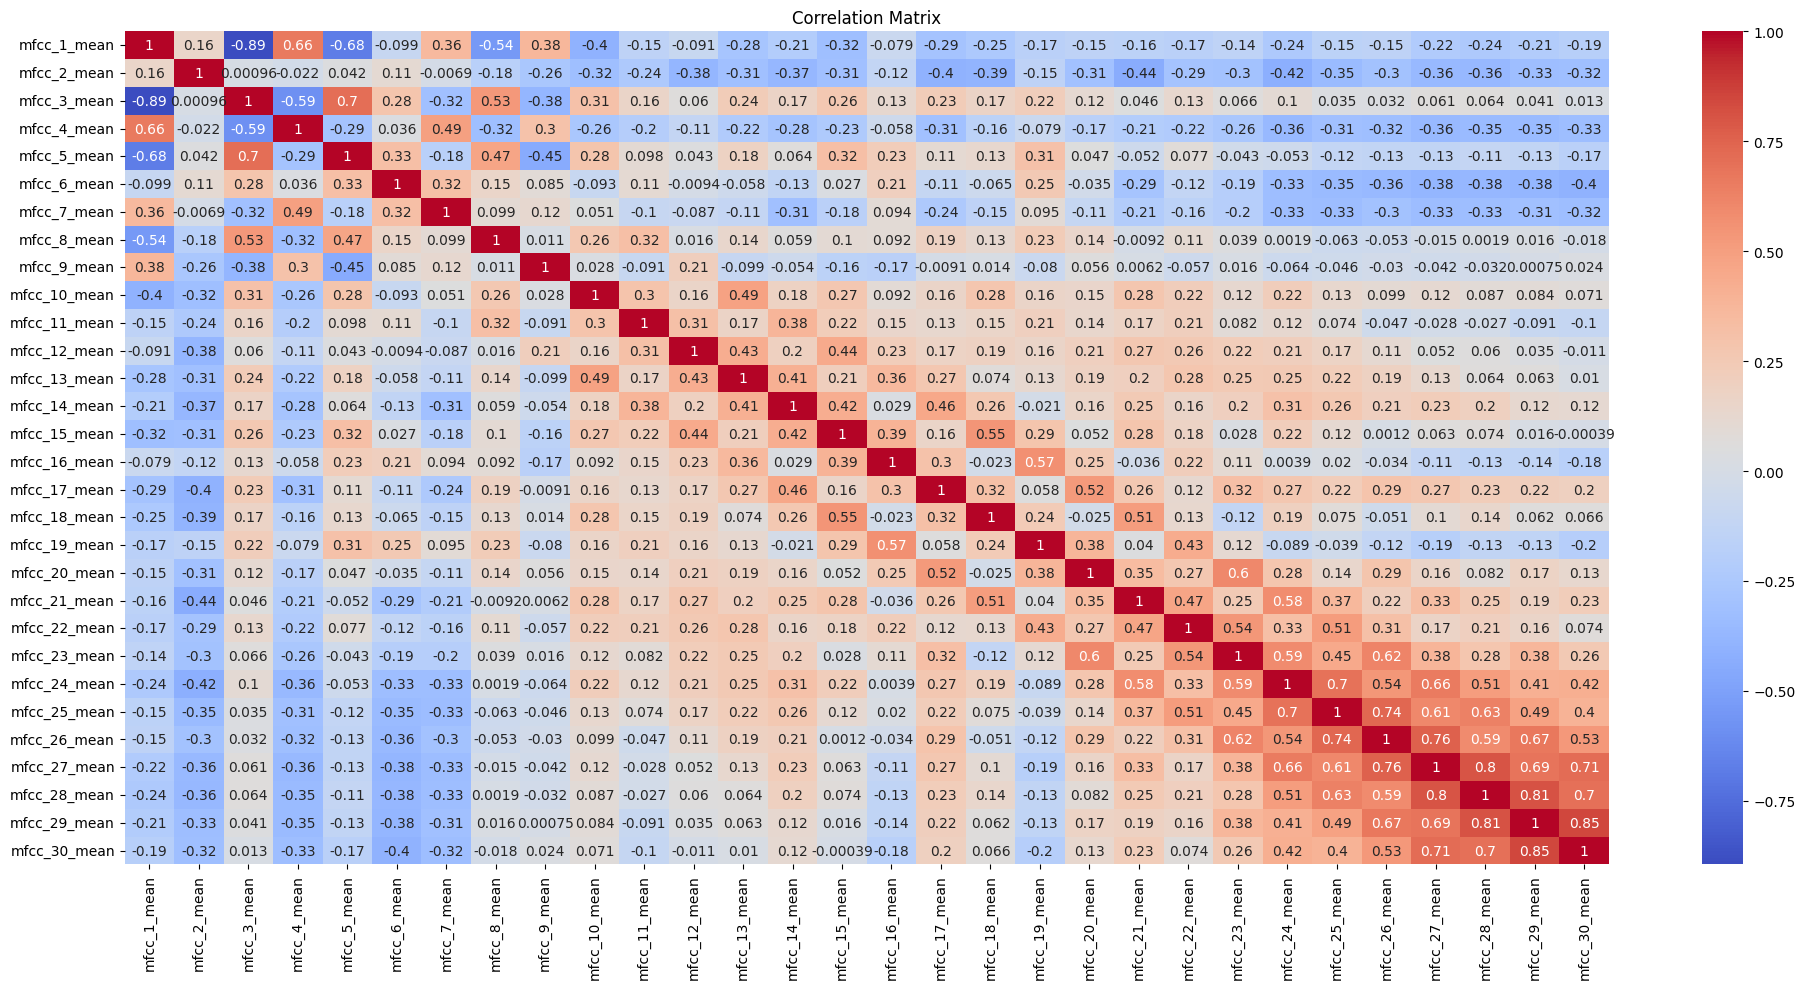

In [14]:
correlation_matrix = features.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot = True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Merging

In [15]:
merged_df = pd.merge(df, df_features.drop(columns=['sampling_rate', 'label']), on='file_path')
merged_df.describe()

,sampling_rate,rms,dbfs,duration,mfcc_1_mean,mfcc_2_mean,mfcc_3_mean,mfcc_4_mean,mfcc_5_mean,mfcc_6_mean,...,mfcc_21_mean,mfcc_22_mean,mfcc_23_mean,mfcc_24_mean,mfcc_25_mean,mfcc_26_mean,mfcc_27_mean,mfcc_28_mean,mfcc_29_mean,mfcc_30_mean
count,17423.0,17423.000000,17423.000000,17423.000000,17423.000000,17423.000000,17423.000000,17423.000000,17423.000000,17423.000000,...,17423.000000,17423.000000,17423.000000,17423.000000,17423.000000,17423.000000,17423.000000,17423.000000,17423.000000,17423.000000
mean,24000.0,0.061057,-24.721248,7.109606,-278.296701,132.555546,-60.246344,12.611546,-6.052727,-31.957448,...,-7.588845,-7.125106,-5.880093,-5.008831,-4.362885,-3.529741,-2.635443,-1.909411,-1.511619,-0.995519
std,0.0,0.019329,2.834867,1.395377,54.000357,15.287105,29.761862,13.511982,12.481245,8.258819,...,2.592443,2.506581,2.762524,2.711007,2.678845,3.007343,2.974983,2.957239,3.030447,3.167781
min,24000.0,0.010383,-39.672676,5.000000,-427.511202,48.512628,-140.001925,-38.882216,-43.976883,-67.397678,...,-20.496210,-16.657037,-15.471072,-16.688544,-18.196103,-13.262357,-12.108825,-15.909237,-13.600392,-12.913287
25%,24000.0,0.048934,-26.207538,5.920000,-319.752529,124.086402,-87.607662,3.083917,-16.230373,-36.796888,...,-9.282004,-8.752468,-7.600510,-6.809771,-6.082177,-5.490909,-4.666183,-3.923353,-3.565100,-3.167136
50%,24000.0,0.060369,-24.383595,6.920042,-291.020125,133.588958,-56.347955,13.224621,-4.766480,-31.800217,...,-7.818501,-7.399722,-6.171450,-5.371185,-4.699708,-4.047569,-3.190936,-2.390827,-2.133742,-1.660739
75%,24000.0,0.071295,-22.938708,8.224000,-227.133410,142.076617,-36.739043,22.387206,3.221367,-26.934843,...,-6.099378,-5.768982,-4.500506,-3.515278,-2.998020,-2.124680,-1.120365,-0.356429,-0.046989,0.628564
max,24000.0,0.228224,-12.832742,10.000000,-130.478102,193.118480,27.189852,61.246145,40.023234,-0.442800,...,10.843512,8.126052,10.358518,10.630782,13.107657,14.275394,14.535093,14.772620,17.051329,18.487673


In [16]:
merged_df.columns

Index(['file_path', 'sampling_rate', 'rms', 'dbfs', 'label', 'duration',
       'mfcc_1_mean', 'mfcc_2_mean', 'mfcc_3_mean', 'mfcc_4_mean',
       'mfcc_5_mean', 'mfcc_6_mean', 'mfcc_7_mean', 'mfcc_8_mean',
       'mfcc_9_mean', 'mfcc_10_mean', 'mfcc_11_mean', 'mfcc_12_mean',
       'mfcc_13_mean', 'mfcc_14_mean', 'mfcc_15_mean', 'mfcc_16_mean',
       'mfcc_17_mean', 'mfcc_18_mean', 'mfcc_19_mean', 'mfcc_20_mean',
       'mfcc_21_mean', 'mfcc_22_mean', 'mfcc_23_mean', 'mfcc_24_mean',
       'mfcc_25_mean', 'mfcc_26_mean', 'mfcc_27_mean', 'mfcc_28_mean',
       'mfcc_29_mean', 'mfcc_30_mean'],
      dtype='object')

In [17]:
merged_df.head()

,file_path,sampling_rate,rms,dbfs,label,duration,mfcc_1_mean,mfcc_2_mean,mfcc_3_mean,mfcc_4_mean,...,mfcc_21_mean,mfcc_22_mean,mfcc_23_mean,mfcc_24_mean,mfcc_25_mean,mfcc_26_mean,mfcc_27_mean,mfcc_28_mean,mfcc_29_mean,mfcc_30_mean
0,./content/LibriSeVoc/gt/3857_180923_000008_000...,24000,0.061510,-24.220951,real,6.840000,-278.748531,119.531957,-45.299107,31.932614,...,-15.086792,-5.827968,-6.599481,-13.241265,-7.977915,-5.331988,-5.434270,0.979900,-6.109516,-9.326597
1,./content/LibriSeVoc/gt/426_122821_000035_0000...,24000,0.060355,-24.385653,real,6.070000,-288.430056,156.781227,-42.138849,21.731352,...,-10.782125,-11.156759,-9.278637,-7.561083,-6.570046,-6.295412,-5.074236,-3.588240,-3.976979,-4.318006
2,./content/LibriSeVoc/gt/5322_7680_000032_00000...,24000,0.034738,-29.183570,real,5.920000,-172.651358,133.751283,-100.039226,22.360786,...,-8.334641,-6.565901,-5.167543,-5.464578,-4.188639,-4.320875,-4.666833,-3.641523,-2.755422,-3.258211
3,./content/LibriSeVoc/gt/78_369_000026_000000.wav,24000,0.101507,-19.870003,real,9.849958,-338.528304,110.269715,-26.445261,7.784086,...,-6.991639,-4.952648,-4.918112,-5.376414,-5.329774,-4.305240,-3.679742,-3.917728,-2.481780,-1.619357
4,./content/LibriSeVoc/gt/39_121915_000013_00000...,24000,0.027996,-31.057756,real,5.529958,-167.696994,129.720838,-108.297205,28.706920,...,-9.642368,-7.698979,-6.123252,-5.236507,-2.911741,-2.767282,-1.194768,-1.781989,-1.221833,-1.297584


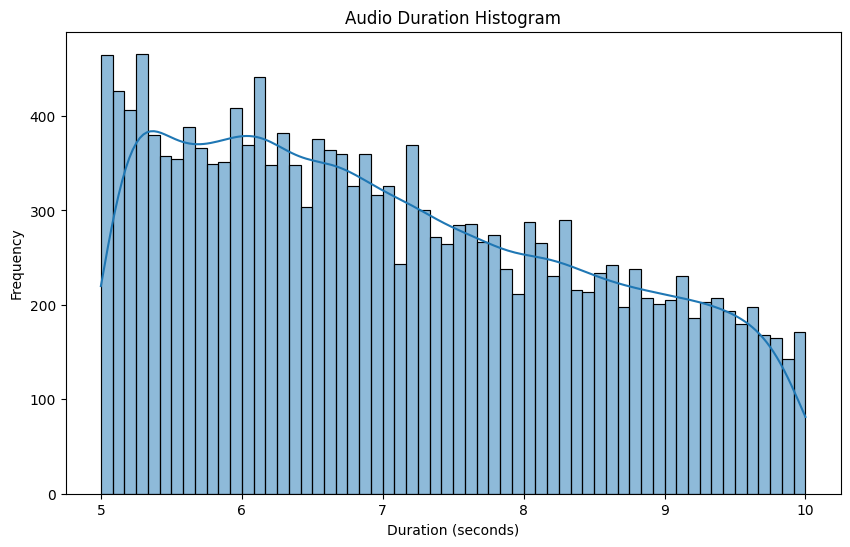

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['duration'], bins=60, kde=True)
plt.title('Audio Duration Histogram')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [19]:
merged_df.drop(columns=['rms', 'dbfs', 'sampling_rate'], inplace=True)

In [20]:
merged_df.to_csv('./output/data/merged_df.csv', index=False)

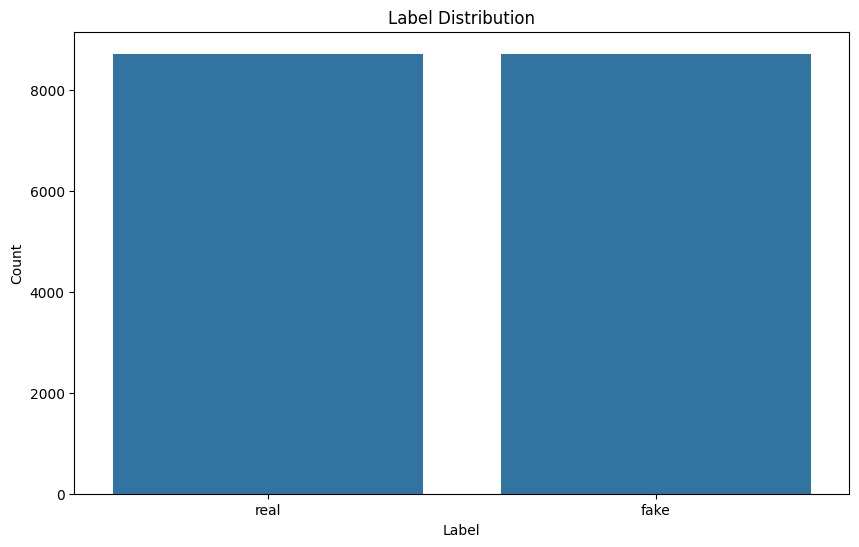

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=merged_df)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

# For ASVSpoof2021

In [22]:
df = pd.read_csv('output/data/df_audio_ASV.csv')
df

,file_path,label,duration
0,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,real,3.96800
1,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,real,1.72800
2,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,real,2.68800
3,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,real,1.14875
4,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,real,3.25600
...,...,...,...
11065,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,fake,1.47200
11066,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,fake,3.44000
11067,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,fake,1.19950
11068,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,fake,3.58400


In [23]:
df.label.value_counts()

label
real    5535
fake    5535
Name: count, dtype: int64

In [24]:
len(df.duration.unique())

3413

In [25]:
df.duration.value_counts()

duration
2.752000    143
2.624000    126
3.520000    122
2.944000    121
2.880000    118
           ... 
2.221312      1
3.542813      1
1.804563      1
2.311437      1
1.199500      1
Name: count, Length: 3413, dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11070 entries, 0 to 11069
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   file_path  11070 non-null  object 
 1   label      11070 non-null  object 
 2   duration   11070 non-null  float64
dtypes: float64(1), object(2)
memory usage: 259.6+ KB


In [27]:
df.describe()

,duration
count,11070.000000
mean,3.140876
std,1.273930
min,0.400000
25%,2.220344
50%,2.981594
75%,3.928000
max,13.440000


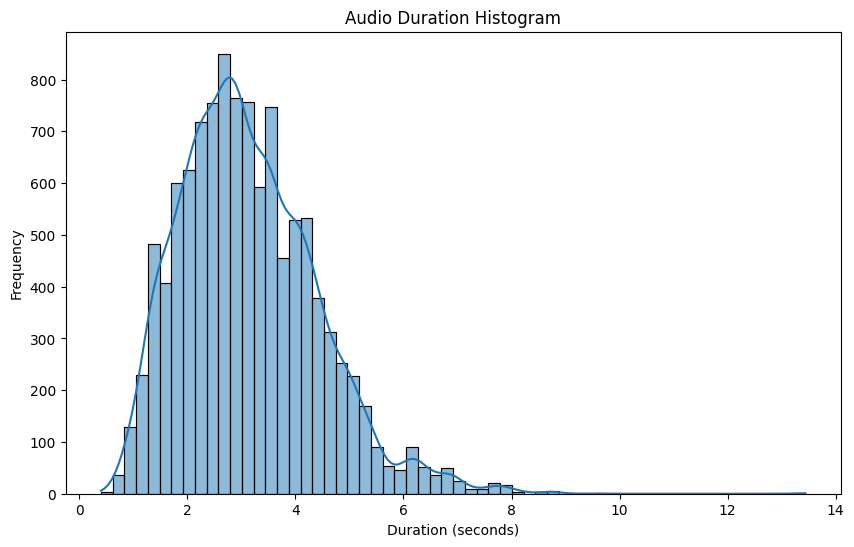

In [28]:
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'], bins=60, kde=True)
plt.title('Audio Duration Histogram')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

In [29]:
df = df[df['duration'] <= 10]
df

,file_path,label,duration
0,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,real,3.96800
1,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,real,1.72800
2,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,real,2.68800
3,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,real,1.14875
4,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,real,3.25600
...,...,...,...
11065,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,fake,1.47200
11066,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,fake,3.44000
11067,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,fake,1.19950
11068,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,fake,3.58400


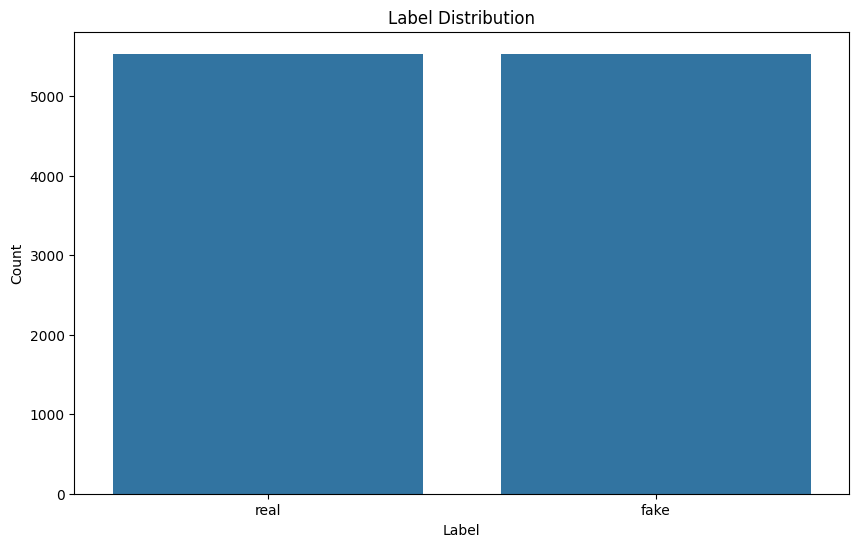

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [31]:
df_features = pd.read_csv(ASV_path)

In [32]:
features = df_features.drop(columns=['label', 'file_path', 'sampling_rate'], axis=1).copy()
labels = df_features['label']

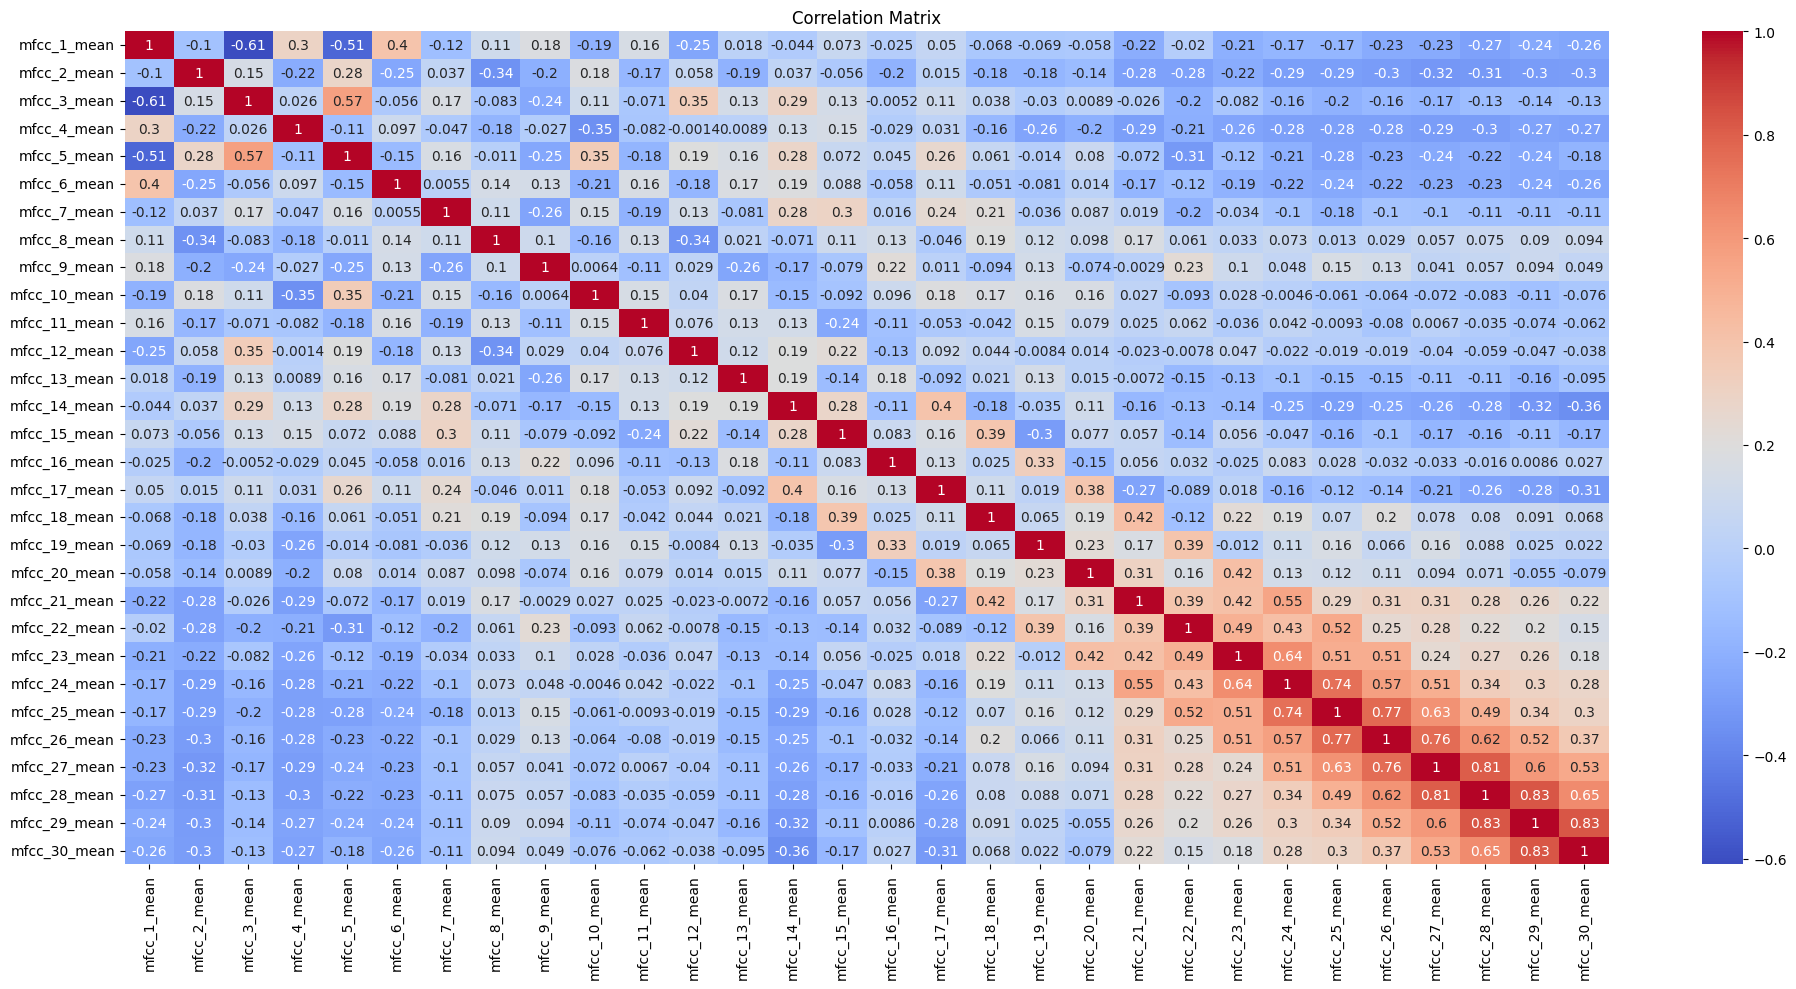

In [33]:
correlation_matrix = features.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot = True)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# Merging

In [34]:
merged_df = pd.merge(df, df_features.drop(columns=['sampling_rate', 'label']), on='file_path')

In [35]:
merged_df

,file_path,label,duration,mfcc_1_mean,mfcc_2_mean,mfcc_3_mean,mfcc_4_mean,mfcc_5_mean,mfcc_6_mean,mfcc_7_mean,...,mfcc_21_mean,mfcc_22_mean,mfcc_23_mean,mfcc_24_mean,mfcc_25_mean,mfcc_26_mean,mfcc_27_mean,mfcc_28_mean,mfcc_29_mean,mfcc_30_mean
0,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,real,3.96800,-193.344440,111.233763,-88.056073,38.037572,-40.713051,-16.389975,-26.460158,...,-11.851017,-6.650229,-6.765173,-4.931829,-2.841785,-4.467681,-5.683324,-4.255191,-3.666148,-5.194473
1,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,real,1.72800,-254.574216,128.657835,-52.838914,58.161394,-25.662155,-40.710296,-35.503349,...,-8.123555,-10.975037,-6.321300,1.305257,-0.391404,-4.974926,-4.307794,-0.804231,-2.766071,-4.037384
2,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,real,2.68800,-206.063741,144.639151,-72.774520,43.053853,-46.548364,-13.283700,-29.351360,...,-9.866676,-9.840577,-7.096459,-4.998405,-9.220068,-6.393003,-4.531131,-4.972300,-3.520026,-4.370568
3,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,real,1.14875,-200.689174,100.685567,-90.460559,35.291576,-47.064348,-26.782721,-26.170791,...,-4.014810,-2.587090,-4.124957,-1.162138,2.530159,8.838564,11.854777,11.771869,8.618314,3.616226
4,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,real,3.25600,-226.498432,130.271562,-72.013331,48.188397,-15.057686,-30.444950,-32.805923,...,-13.152443,-5.562284,-7.884548,-6.297796,-3.962418,-3.252032,-5.221850,-6.735967,0.083158,2.052527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11063,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,fake,1.47200,-166.411319,119.122520,-80.686033,48.844435,-44.226808,-1.183130,-28.767357,...,-10.580727,-6.434962,-9.758100,-9.368653,-8.446242,-7.305362,-6.594995,-4.342254,-2.898425,-4.570464
11064,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,fake,3.44000,-200.673092,155.100745,-68.914149,14.314836,-21.250184,-15.064963,-24.458378,...,-10.189279,-9.760100,-8.609093,-8.945636,-6.111569,-5.954047,-3.510326,-4.244118,-4.565288,-1.851681
11065,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,fake,1.19950,-205.681064,126.806904,-97.050972,16.199766,-66.378555,-19.680396,-28.565814,...,-3.302290,-3.328551,4.720171,10.386865,8.911500,8.540615,3.331858,-2.133517,-3.724477,-1.040429
11066,./content/ASVspoof2021/ASVspoof2021_DF_eval/fl...,fake,3.58400,-217.602418,122.781845,-64.769233,46.520871,-28.381790,-34.176258,-35.828586,...,-17.031714,-9.900830,-5.661827,-5.549434,-4.873806,-5.734006,-3.435556,-2.630331,-3.591145,-2.134005


In [36]:
merged_df.to_csv('./output/data/merged_df.csv', mode='a', header=False, index=False)

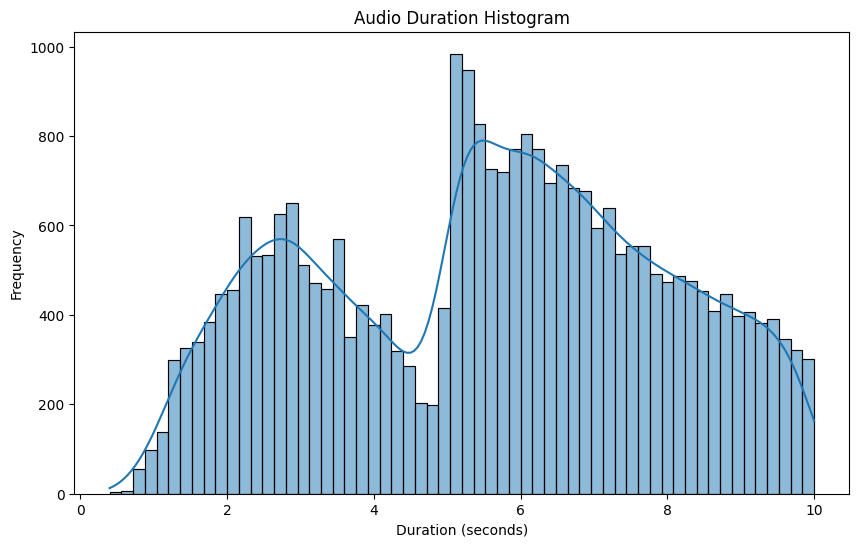

In [37]:
merged_df = pd.read_csv('./output/data/merged_df.csv')

plt.figure(figsize=(10, 6))
sns.histplot(merged_df['duration'], bins=60, kde=True)
plt.title('Audio Duration Histogram')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.show()